# Challenge 2

In this challenge we will continue working with the `Pokemon` dataset. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.


## Problem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [159]:
# Import libraries
import numpy as np
import pandas as pd

In [160]:
# Importing the dataset
pokemon = pd.read_csv ('pokemon.csv')
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [161]:
# 1. What is the formula to compute Total?
Total_value = pokemon['Total']== pokemon['HP']+pokemon['Attack']+pokemon['Defense']+pokemon['Sp. Atk']+pokemon['Sp. Def']+pokemon['Speed']

In [162]:
# 2.Does the formula work for all pokemon?
"""The formula works for the majority of Pokémon,however Some Pokémon may have unique abilities, 
forms, or attributes that deviate from the standard formula. In such cases, 
the total statistics may be adjusted to reflect the Pokémon's individual characteristics."""

"The formula works for the majority of Pokémon,however Some Pokémon may have unique abilities, \nforms, or attributes that deviate from the standard formula. In such cases, \nthe total statistics may be adjusted to reflect the Pokémon's individual characteristics."

In [163]:
#Get the stats
round(pokemon.describe(),2)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,362.81,435.10,69.26,79.00,73.84,72.82,71.90,68.28,3.32
std,208.34,119.96,25.53,32.46,31.18,32.72,27.83,29.06,1.66
min,1.00,180.00,1.00,5.00,5.00,10.00,20.00,5.00,1.00
25%,184.75,330.00,50.00,55.00,50.00,49.75,50.00,45.00,2.00
50%,364.50,450.00,65.00,75.00,70.00,65.00,70.00,65.00,3.00
75%,539.25,515.00,80.00,100.00,90.00,95.00,90.00,90.00,5.00
max,721.00,780.00,255.00,190.00,230.00,194.00,230.00,180.00,6.00


In [164]:
# Define sample pokemon choosen - 'Venusaur'

# Using mean value aproximately on my hypothesis for the sample pokemon
HP = 69
Attack = 79
Defense = 74
Sp_Atk = 73
Sp_Def = 72
Speed = 68

# Using the formula to compute Total for my sample
Total_sample = HP + Attack + Defense + Sp_Atk + Sp_Def + Speed
Total_sample

# Get the Total from the dataset for the same Pokémon
total_from_dataset = 525  

# Comparing the calculated Total_sample with the Total from the dataset
if Total_sample == total_from_dataset:
    print("The hypothesis is supported: Total is computed based on HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed.")
else:
    print("The hypothesis is not supported: Total does not match the calculated Total.")


The hypothesis is not supported: Total does not match the calculated Total.


## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

In [165]:
# Creating a Combo-type column
pokemon['Combo Type']=pokemon['Type 1'] + ('-'+pokemon['Type 2']).fillna('')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combo Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass-Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass-Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass-Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass-Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Fire


In [166]:
# checking for the Nan values
null_counts = pokemon.isnull().sum()
null_counts

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Combo Type      0
dtype: int64

In [167]:
# Checking for the null values and replace them
pokemon['Type 2'].fillna('Unknown', inplace = True)
unique_type = list(pokemon['Type 2'].unique())
unique_type

['Poison',
 'Unknown',
 'Flying',
 'Dragon',
 'Ground',
 'Fairy',
 'Grass',
 'Fighting',
 'Psychic',
 'Steel',
 'Ice',
 'Rock',
 'Dark',
 'Water',
 'Electric',
 'Fire',
 'Ghost',
 'Bug',
 'Normal']

In [168]:
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
Combo Type    object
dtype: object

In [169]:
# Perform One Hot Encoding on Type 1 and Type 2
type1_encoded = pd.get_dummies(pokemon['Type 1'])
type2_encoded = pd.get_dummies(pokemon['Type 2'])

# Concatenate the encoded columns
encoded_pokemon_data = pd.concat([type1_encoded, type2_encoded], axis=1)
encoded_pokemon_data

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Unknown,Water
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [171]:
pokemon['Type 2'].unique()

array(['Poison', 'Unknown', 'Flying', 'Dragon', 'Ground', 'Fairy',
       'Grass', 'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark',
       'Water', 'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'],
      dtype=object)

In [172]:
# Concatenating the encoded Types with the original pokemon dataframe
new_encoded_pokemon = pd.concat([pokemon,type1_encoded, type2_encoded], axis=1)
new_encoded_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Unknown,Water
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,0,0,0,1,0,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,0,0,0,1,0,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0,0,0,0,1,0,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0,0,0,0,1,0,0,0,0,0
4,4,Charmander,Fire,Unknown,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0,0,0,0,0,0,0,0,0,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,0,0,0,0,0,0,0,0,0,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,0,0,0,0,0,0,0,0,0,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,0,0,0,0,0,0,0,0,0,0


In [173]:
# Dropping no longer needed columns
pokemon_new = new_encoded_pokemon.drop(['Type 1','Type 2','#','Combo Type','Generation','Legendary','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],axis = 1)
pokemon_new.head()

,Name,Total,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Unknown,Water
0,Bulbasaur,318,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Ivysaur,405,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Venusaur,525,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,VenusaurMega Venusaur,625,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Charmander,309,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

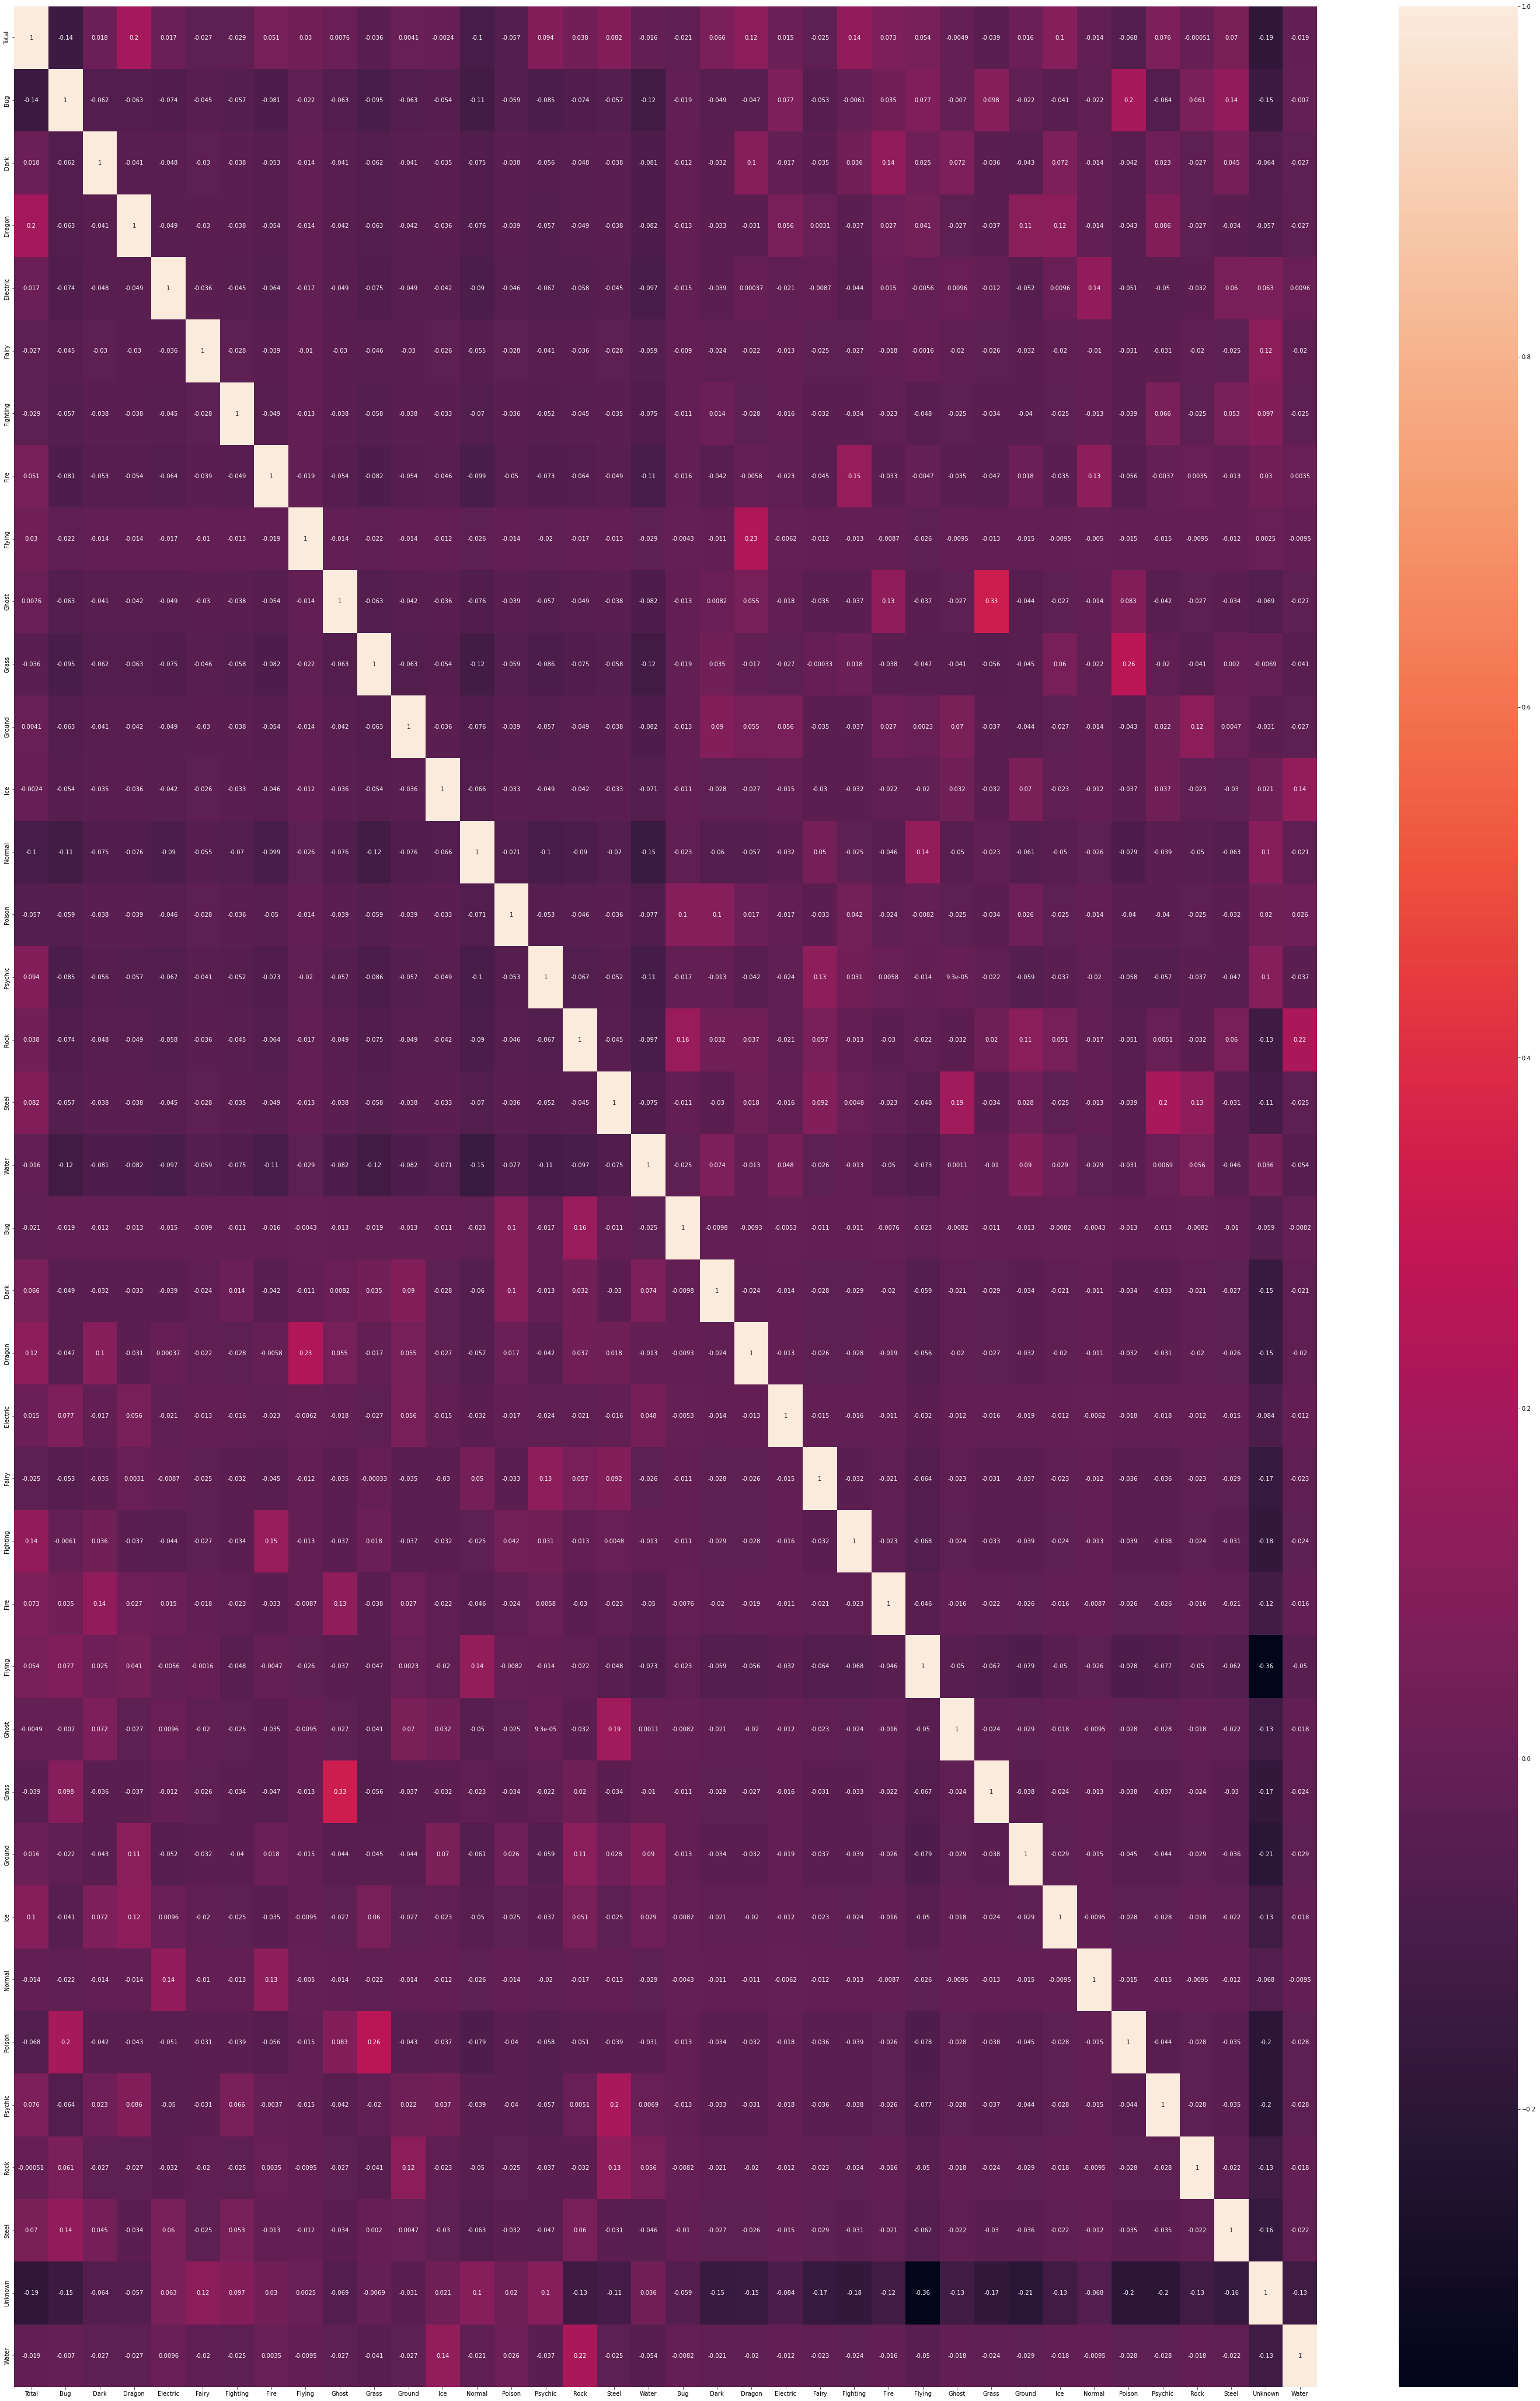

In [174]:
# checking correlations matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = pokemon_new.corr()
fig, ax = plt.subplots(figsize=(50,75))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show() 

In [175]:
# Getting the correlation between 'Total' and each encoded type field
corr_matrix = pokemon_new.corr()
correlations_ranked = corr_matrix['Total'].abs().sort_values(ascending=False)
correlations_ranked

Total       1.000000
Dragon      0.196532
Unknown     0.185945
Bug         0.143957
Fighting    0.138726
Dragon      0.115240
Normal      0.104150
Ice         0.100870
Psychic     0.094364
Steel       0.082000
Psychic     0.076054
Fire        0.073234
Steel       0.070307
Poison      0.067837
Dark        0.065844
Poison      0.057123
Flying      0.054048
Fire        0.050527
Grass       0.039224
Rock        0.037524
Grass       0.036057
Flying      0.029504
Fighting    0.029086
Fairy       0.026948
Fairy       0.024606
Bug         0.021375
Water       0.018800
Dark        0.017818
Electric    0.016715
Ground      0.016486
Water       0.015640
Electric    0.014669
Normal      0.013956
Ghost       0.007594
Ghost       0.004885
Ground      0.004082
Ice         0.002412
Rock        0.000512
Name: Total, dtype: float64

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [176]:
# Calculate the average 'Total' for each combination of Type 1 and Type 2
average_totals = new_encoded_pokemon.groupby(['Type 1', 'Type 2'])['Total'].mean()

# Find the combination with the highest average 'Total'
best_combination = average_totals.idxmax()
print("The best combination of Type 1 and Type 2 is:", best_combination)

The best combination of Type 1 and Type 2 is: ('Ground', 'Fire')
